### Data 

### Numpy

#### 1D-arrays

In [1]:
import numpy as np

# create an array 
data = np.array([2,5,6,7])
# indexing is similar to list
data[-1]
data[-3:-1]

# methods
max_data = data.max()
min_data = data.min()
mean_data = data.mean()
std_data = data.std()
print("The max is {}, the min is {}, and the std is {}".format(max_data, min_data, std_data))


The max is 7, the min is 2, and the std is 1.8708286933869707


#### N-D arrays

In [2]:
# create the array with, 
nd = np.array([[1,2,3],[4,5,6],[7,8,9]])
# get the maximum per row
nd.max(axis=1)
# get the size 
np.shape(nd)
# nd random
nd_ran = np.random.rand(3,3)
# multiply 
c = np.matmul(nd, nd_ran)


### Pandas

In [3]:
import pandas as pd
# Load a csv
emissions = pd.read_csv("./aux/data/greenhouse-gas-emissions-industry-and-household-year-ended-2020.csv")
# Show first 3 rows
emissions.head(3)
# Show last 3 rows
emissions.tail(3)
# atribute columns of dataFrame object
column_to_drop = emissions.columns[2]
# drop the column column_to_drop
emissions = emissions.drop(columns = column_to_drop)

In [4]:
# number of elements
emissions.size
# shape of the DF
emissions.shape
# values of the DF
emissions.values
# mean of different colums
emissions.mean()

/tmp/ipykernel_38611/2884969575.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  emissions.mean()


year            2013.496124
data_value    604392.364232
dtype: float64

Let's look at the index of the dataframe.

In [5]:
emissions.index

RangeIndex(start=0, stop=20638, step=1)

As you can see, the index ranges from 0 to 1000. Let's set the index to something more useful. Notice that we have to specify the 'inplace' = True keyword to ensure that the change is made in place.

In [6]:
emissions.set_index('year', inplace = True)

In [7]:
emissions.index

Int64Index([2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='year', length=20638)

iloc uses integer indexing. Regardless of what the actual index is, iloc will get the associated rows/columns from integers.

In [14]:
# emissions.columns
emissions.columns
# locate a row
emissions.loc[2007]
# locate a multiple rows 
emissions.loc[[2007, 2017]]
# loacte the entries with Agriculutre keyword in the anzsic_descriptor field 
emissions_agriculture = emissions[emissions['anzsic_descriptor'] == 'Agriculture']

In [15]:
# describe the variable 
emissions_agriculture.describe()

,data_value
count,3.220000e+02
mean,3.569107e+06
std,1.024997e+07
min,5.000000e-02
25%,8.282500e+02
50%,1.152000e+03
75%,3.945396e+04
max,4.208706e+07


We can analyze how many numbers our data frame has

<AxesSubplot:>

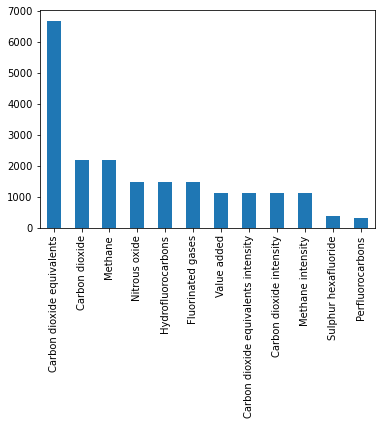

In [26]:
# the mean of number entries
emissions.isna().mean()
# the mean of not a number entries
emissions.notna().mean()
# the values 
emissions.data_value
# count different values of  a column
emissions.columns
emissions["variable"].value_counts()
# and plot them
emissions["variable"].value_counts().plot(kind = "bar")


<AxesSubplot:xlabel='year'>

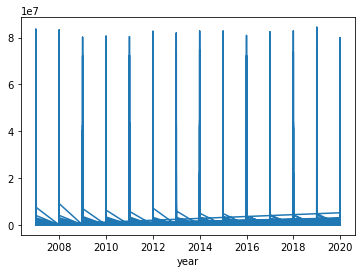

In [28]:
emissions.columns
emissions.data_value.plot()

In [3]:
# importing modules
from sklearn import datasets
import pandas as pd
import numpy as np


# We can load in the iris dataset directly from sklearn.
iris = datasets.load_iris()

# Part 1
'''
a) Create a pandas dataframe called 'data' that combines the petal and sepal data with species information 
The five columns should be 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'
'''
data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
data['species'] = iris.target
print(data.columns)


'''
b) Notice how the 'species' column is just numbers. The names of the species are stored in a list called target_names.
Replace the species number with the corresponding name from the target_names list.
HINT: We can use the df.replace() function with a map dictionary.
'''
map_dict = {}
for i in range(0,len(iris.target_names)):
    map_dict[i] = iris.target_names[i] 
data['species'] = data.species.replace(map_dict)

# Part 2
'''
a) First, we have to create two new columns, 'sepal_length/width'
and 'petal length/width' to get a sense of the ratios. Create these columns in our 'data' dataframe.
'''
data['sepal_length/width'] = data['sepal_length'] / data['sepal_width']
data['petal_length/width'] = data['petal_length'] / data['petal_width']

'''
b) Now, use the transform function to find the 'mean_sepal_length/width'
and the 'mean_petal_length/width' for each species. You should create these columns
in the 'data' dataframe.
'''
data['mean_sepal_length/width'] = data.groupby('species')['sepal_length/width'].transform('mean')
data['mean_petal_length/width'] = data.groupby('species')['petal_length/width'].transform('mean')

'''
c) Find the squared difference between each row's length/width value and the average of its species.
Create two new columns titled 'sq_diff_sepal_length/width' and ''sq_diff_petal_length/width'. 
HINT: Use the function np.square()
'''
data['sq_diff_sepal_length/width'] = np.square(data['sepal_length/width'] - data['mean_sepal_length/width'])
data['sq_diff_petal_length/width'] = np.square(data['petal_length/width'] - data['mean_petal_length/width'])

# Part 3
'''
a) Create a new dataframe called 'outliers_sepal' and 'outliers_petal' with the top 20 values that deviate most.
HINT: Use the sort_values() function.
'''
outliers_sepal = data.sort_values(by = 'sq_diff_sepal_length/width', ascending = False).head(20)
outliers_petal = data.sort_values(by = 'sq_diff_petal_length/width', ascending = False).head(20)

'''
b) Do any of the rows overlap? Create a list called 'outliers' to store the index numbers of any overlapping rows.
HINT: Use list comprehension.
'''
outliers = [x for x in outliers_petal.index.values if x in outliers_sepal.index.values]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


### Heart disease dataset 

## Dataset
**[UCI Heart Disease Dataset](https://www.kaggle.com/ronitf/heart-disease-uci)** <br/>
Goal: presence/absence of heart disease based the following health-related features

- *age*: age in years 
- *sex*: (1 = male; 0 = female) 
- *cp*: chest pain type 
- *trestbps*: resting blood pressure (in mm Hg on admission to the hospital) 
- *chol*: serum cholestoral in mg/dl 
- *fbs*: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- *restecg*: resting electrocardiographic results 
- *thalach*: maximum heart rate achieved 
- *exang*: exercise induced angina (1 = yes; 0 = no) 
- *oldpeak*: ST depression induced by exercise relative to rest 
- *slope*: the slope of the peak exercise ST segment 
- *ca*: number of major vessels (0-3) colored by flourosopy 
- *thal*: 3 = normal; 6 = fixed defect; 7 = reversable defect 
- *target*: have disease or not (1=yes, 0=no)

In [ ]:
### Importing Files

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
### Importing Files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("./aux/data/heart.csv", index_col = 0)
data.head()

# Part 1
'''
a) Use one-hot encoding to transform the 'thal' feature into two columns called 'is_normal', 'is_fixed', 
and 'is_reversible'. Be sure to drop the 'thal' column afterwards.
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
'''
data['thal'].replace({3: 'normal', 6: 'fixed', 7: 'reversible'}, inplace = True)
data = pd.get_dummies(data, columns=["thal"], prefix=["is"])

'''
b) Use min-max normalzaition to resacle all the features between 0 and 1. Make sure that data remains in the same
dataframe format.
Hint: Use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data.values), columns=data.columns, index=data.index)

'''
c) Split the data into a train, test set using a 75/25 split. Use a random state of 42 for grading purposes.
Hint: Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
'''
X = data.drop(columns = 'target')
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Part 2
'''
a) Fit a logisitic regression classifier on the data. Save the model in a varaible called 'clf'. Use a random state of 42.
Use the following paramters: penalty:'l2', solver:'liblinear', C:0.1.
'''
clf = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, random_state = 42)
clf.fit(X_train, y_train)

'''
b) Generate 0/1 predictions on the test set and store them in a varaible called 'pred'. 
Generate proabbility prerdictions on the test set and store them in a variable called 'scores'.
'''
pred = clf.predict(X_test)
scores = clf.predict_proba(X_test)[:,1]
print("LOGISTC REGRESSION \n")
print(scores.mean())
print('Accuracy: ', accuracy_score(y_test, pred))
print('AUROC: ', roc_auc_score(y_test, scores))
print(classification_report(y_test, pred))
'''
c) Fill in this function to find and return the root mean sqaured error between the predicted and actual values.
Hint: Use his formula for the rsme: https://sciencing.com/calculate-mean-deviation-7152540.html.
'''
def rsme(predictions, actuals):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(actuals, predictions, squared=False)

'''
d) Try using a random forest classifier to fit the data instead. Use the default paramters and a random state of 42.
Save the fitted model into a varaible called 'rf'. Generate the 'pred' and 'scores' in a similar way to part b.
Hint: Use https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
scores = rf.predict_proba(X_test)[:,1]
print("RANDOM FORETS \n")
print('Accuracy: ', accuracy_score(y_test, pred))
print('AUROC: ', roc_auc_score(y_test, scores))
print(classification_report(y_test, pred))

LOGISTC REGRESSION 

0.5104167280008562
Accuracy:  0.8421052631578947
AUROC:  0.9066202090592334
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        35
         1.0       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

RANDOM FORETS 

Accuracy:  0.8552631578947368
AUROC:  0.9059233449477352
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84        35
         1.0       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76

